## Project of COMP3400
### Name of Student: Haoming Luo
### Student ID: 202015111

### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import torchvision.models as models
from tqdm.auto import tqdm
import torch.nn as nn
import csv
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\a6649\anaconda3\envs\Jason\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Datatype info

In [47]:
wineCsv = r'wine-data-set .csv'
df = pd.read_csv(wineCsv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 606.0 KB


In [70]:
# Binarize the quality column using a lambda function
df.loc[:, "quality_binary"] = df["quality"].apply(lambda x: 1 if x > 5 else 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
target_variable = 'quality'
X = df.drop(target_variable, axis=1)
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
initial_model = LogisticRegression()
initial_model.fit(X_train, y_train)
bottom_line_accuracy = accuracy_score(y_test, initial_model.predict(X_test))
print(f'Bottom-line Accuracy: {bottom_line_accuracy}')

Bottom-line Accuracy: 0.748646558391338


### Sample Display

In [59]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Statistical info

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Check if there are missing values

In [5]:
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Based on the statistics presented abvoe, the CSV file does not contain any missing values.
##

## Exploratory Data Analysis
 
### Distribution Plot
   - Visualizing the outliers
   - Further outliers treatments may help model to prove the performance

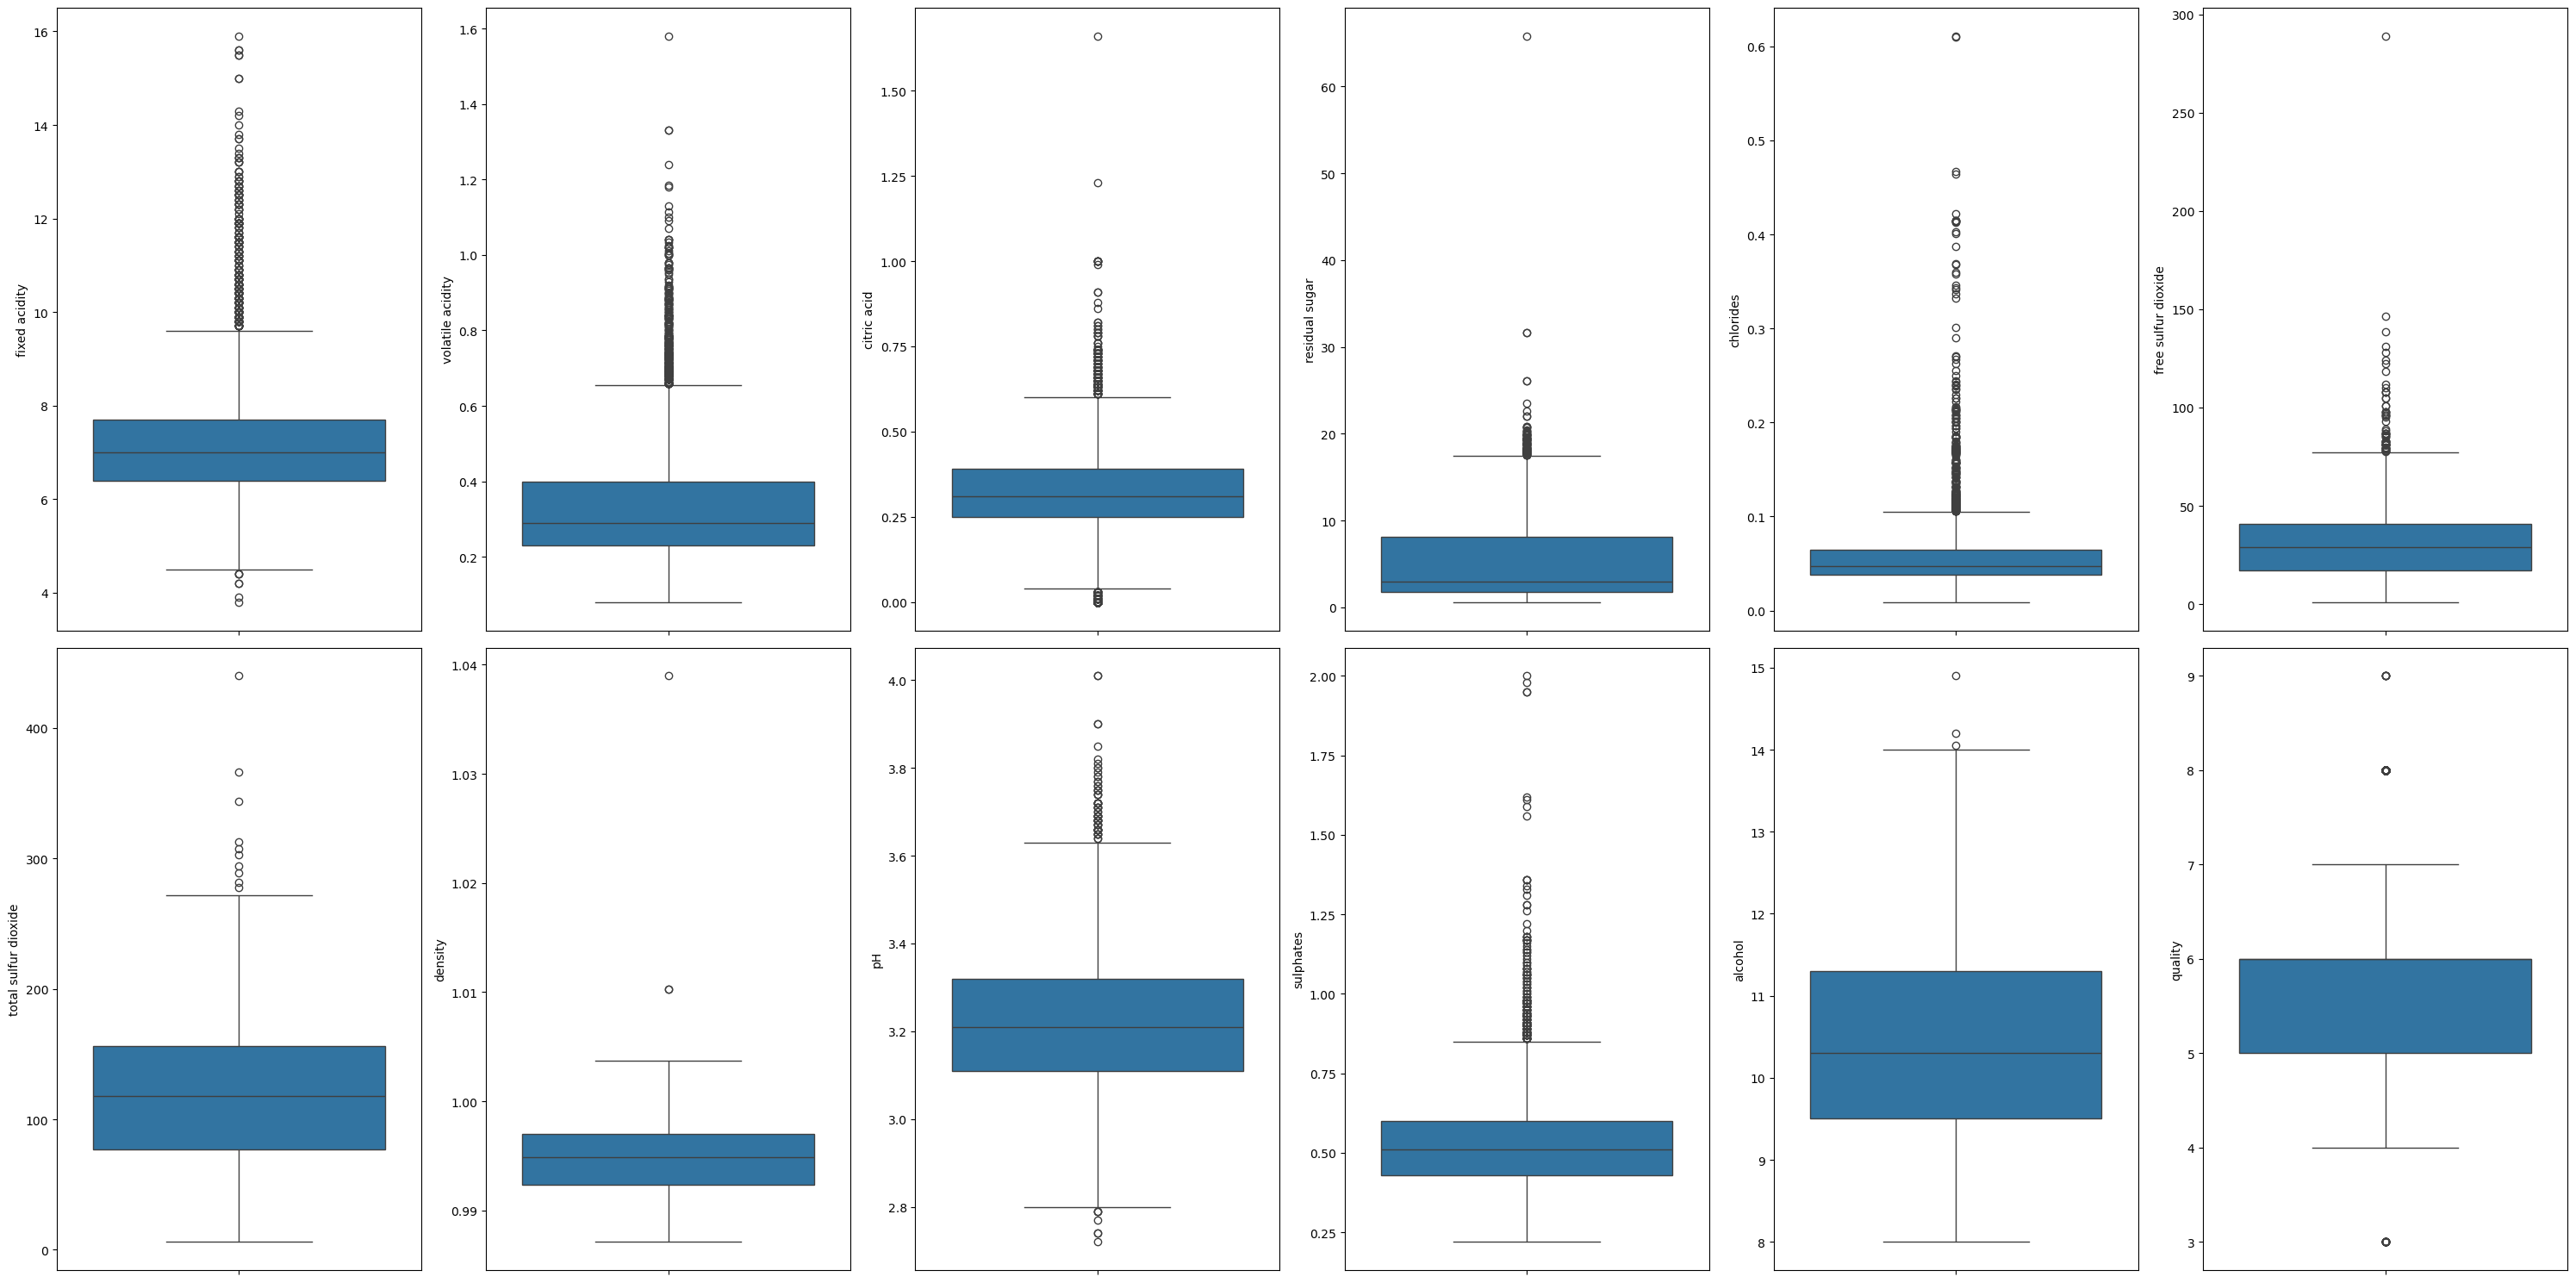

In [6]:
# create box plots
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (30,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax =ax[index])
        index +=1
plt.tight_layout()

## Identify outliers by Using IQR (Interquartile Range)


In [8]:
df_cleaned = df.copy()

for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers from each column
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
df_cleaned.to_csv('cleaned_data.csv', index=False)
print(f'Num of instances before removing outliers: {len(df)}')
print(f'Num of instances after removing outliers: {len(df_cleaned)}')   

Num of instances before removing outliers: 6463
Num of instances after removing outliers: 4395


## Distribution Plot after data cleaning

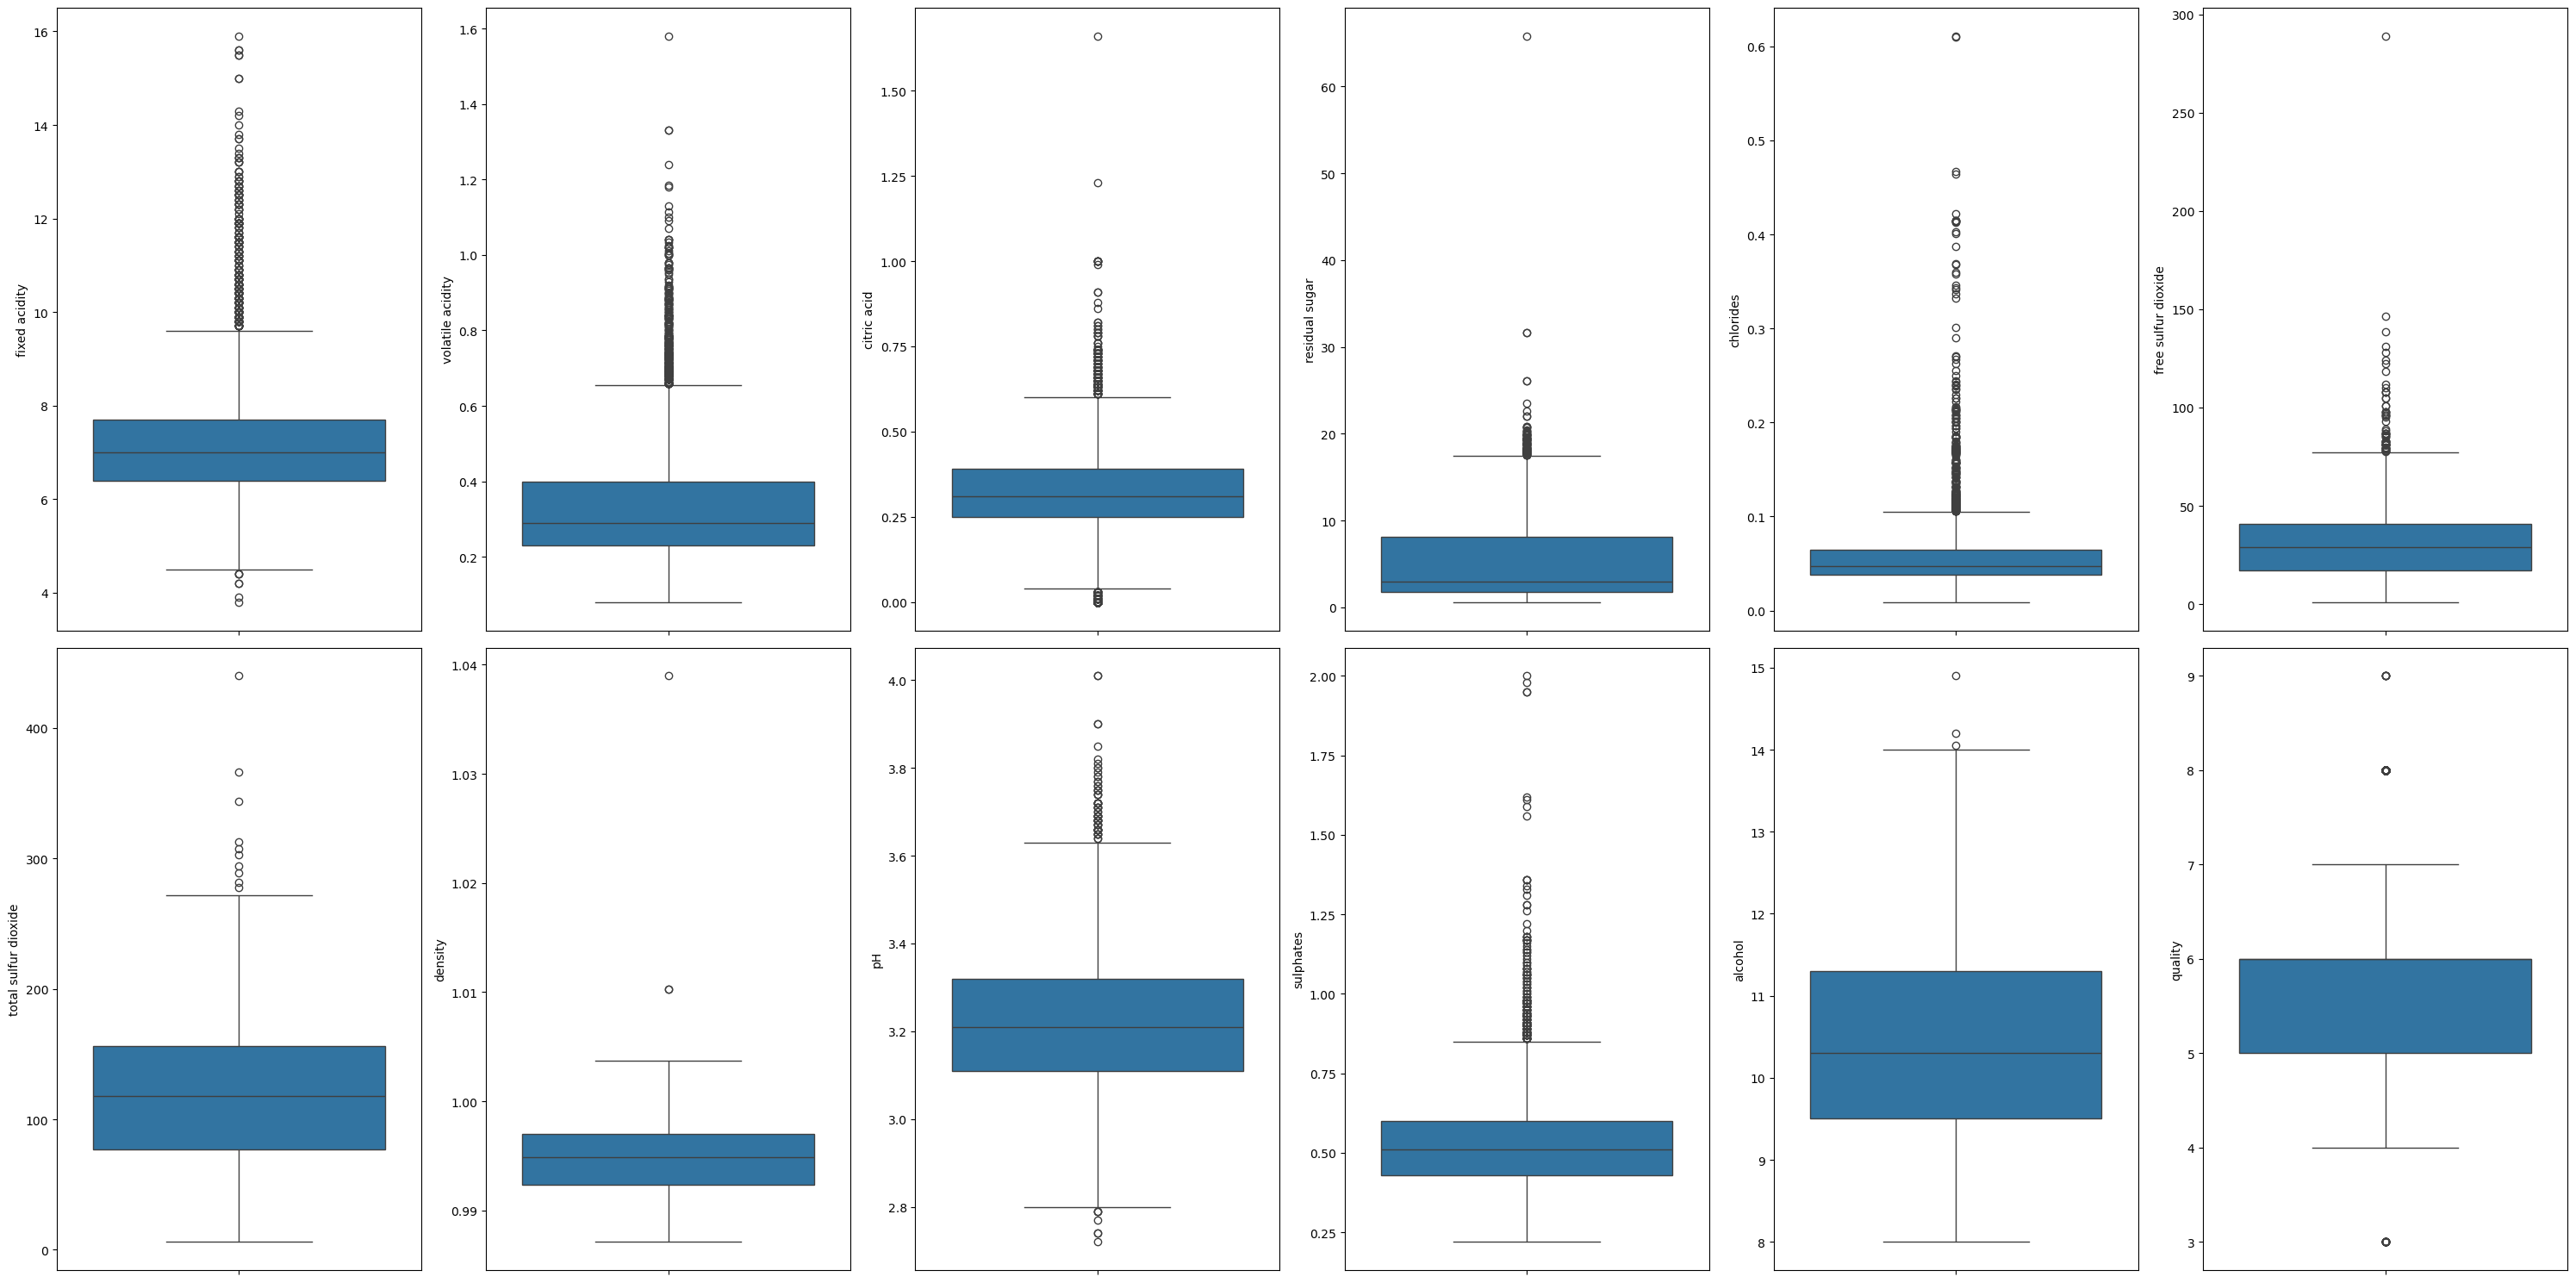

In [9]:
# create box plots
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (30,15))
index = 0
ax = ax.flatten()

for col, value in df_cleaned.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax =ax[index])
        index +=1
plt.tight_layout()

### Distance Plot
   - Visualizing the value range

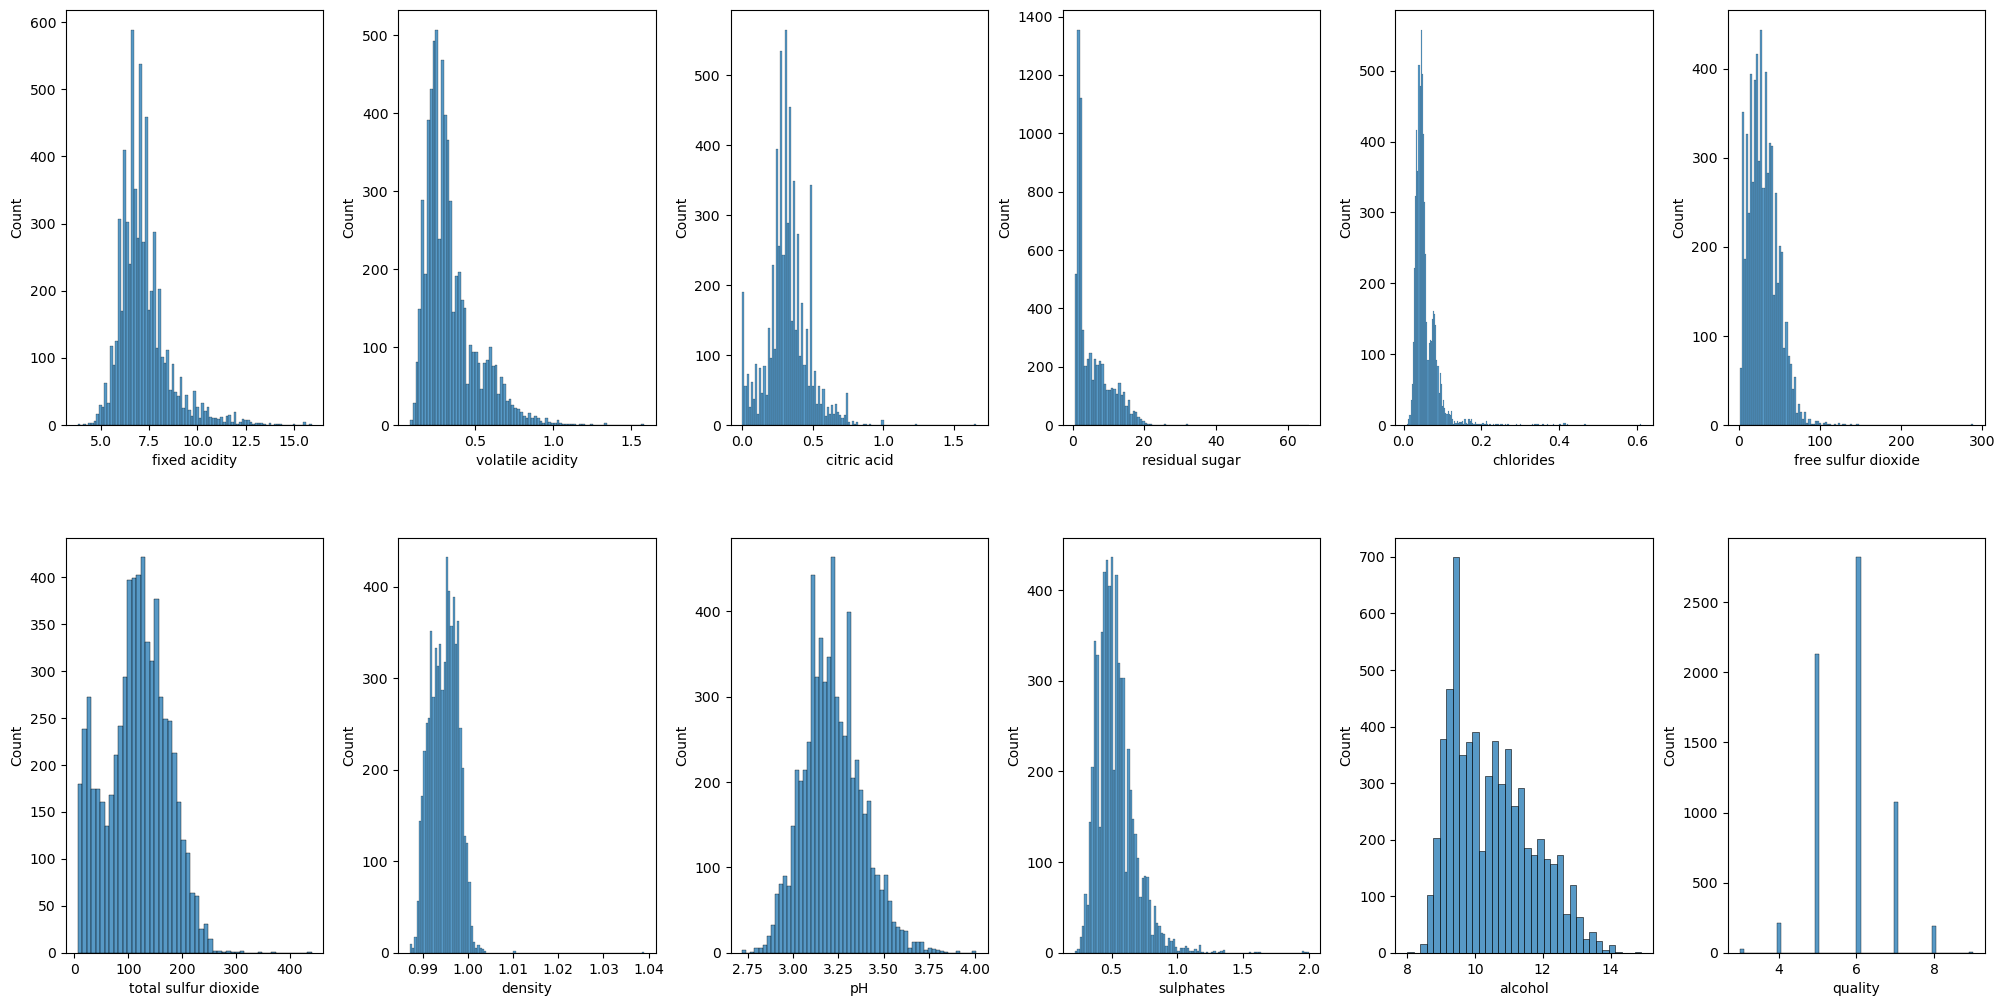

In [10]:
# create dist plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index]) 
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

## Distrubution of Wine Quality 

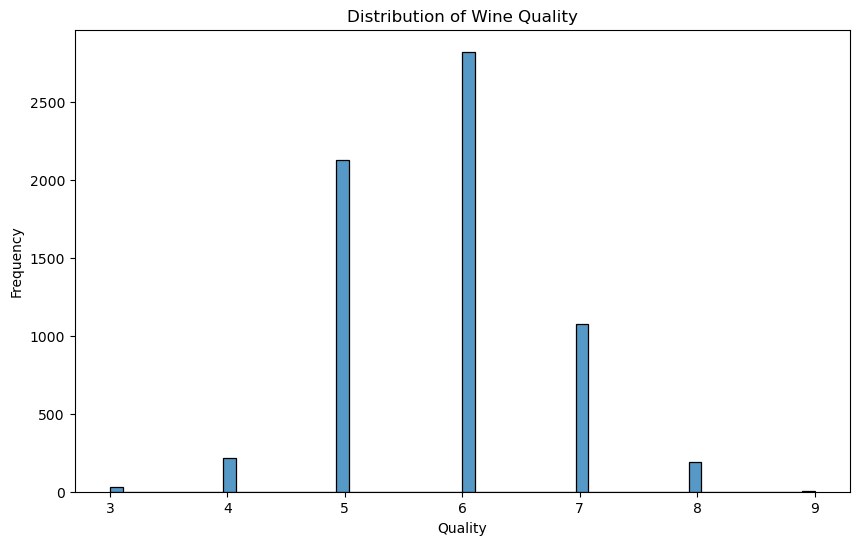

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'])
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

## Initial Classification model construction:
  - custimize a dataset to load 11 or less non-target variables
  - save the non-target variables in self.parameters
  - save the qualities as label for training and testing purpose
  - select features / predictors 
  - feature selection based on the index of variable from df such as 1 = volatile acidity

In [40]:
class wineDataset(Dataset):
    def __init__(self, root_dir, features, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        self.parameters = []
        self.label = []
        
       #update with feature selection
       #features = None which means all the features are selected
        for value in df.values:
            if features != None:
                instance = []
                for num in features:
                    instance.append(value[num])
                self.parameters.append(instance)
            else:
                instance = value[0:-1]
                self.parameters.append(instance.tolist())

            self.label.append(value[-1])

        if self.transform:
            print('sample before transform', self.parameters[1])
            self.parameters = self.transform.fit_transform(self.parameters)
            print('sample after transform', self.parameters[1])
            print('transformed')
            

    
    def __len__(self):
        return len(self.parameters)

    def __getitem__(self, idx):

        data = self.parameters[idx]
 
        label = self.label[idx]
        return torch.tensor(data).float(), label

## Set up dataset and dataloader 
 - Using 80% dataset for training 
 - Using 20% dataset for testing

In [41]:
dataset = wineDataset(csv, features=None, transform = None)
train_indices, test_indices = train_test_split(list(range(int(len(dataset)))), test_size=0.2, random_state=80)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)
train_dataloader = DataLoader(train_dataset, batch_size=6, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False)

### Logistic Regression Model build in Pytorch
 -  buiding a Logistic Regression model in Pytorch by using three linear layers

In [42]:
class bottomLine(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        # creat a linear layer that can take 11 non-traget variable
        self.layer_1 = nn.Linear(in_features = num_features, out_features=256)
        self.layer_2 = nn.Linear(in_features=256, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=11)
 
    def forward(self, x):
        return  self.layer_3(self.layer_2(self.layer_1(x)))

## Set up device
  - set up device and assign the model to CPU/CUDA
  - After testing couple of times, I find cpu is faster than cuda when computing on smaller dataset at least on my pc

In [43]:
device = torch.device("cpu")
## Surprisingly 'CPU' is faster in this case
print(device)
model = bottomLine(11).to(device)

cpu


## Using MLflow to record and visulize accuracy
- launch mlflow ui in prompt
- monitor training process

In [44]:
import mlflow
mlflow.set_tracking_uri('http://127.0.0.1:5000')

## Set up Loss Function and optimizer

In [45]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Train and Test on the Logistic Regression Model for 40 epochs

In [46]:
with mlflow.start_run(run_name='Basic Logistic Regression Model'):
     num_epochs = 40
     highest_accuracy = 0
     for epoch in tqdm(range(num_epochs)):
        model.train()
        running_corrects = 0
        running_loss = 0.0
        for data, label in train_dataloader:
            data = data.to(device).float()
            label = label.to(device)
            outputs = model(data)
            loss = criterion(outputs.float(), label.long())

            _, preds = torch.max(outputs, 1)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            running_corrects += torch.sum(preds == label.data)
            running_loss += loss.item() * (data.size(0))                 
        epoch_acc = running_corrects.double() / (len(train_dataset))
        epoch_loss = running_loss / len(train_dataset)  

        mlflow.log_metric('loss', epoch_loss, step=epoch)
        mlflow.log_metric('train_accuracy', epoch_acc, step=epoch)


        model.eval()
        running_corrects = 0
        with torch.no_grad():
            for data, label in test_dataloader:
                data = data.to(device)
                label = label.to(device)
                outputs = model(data)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == label.data)
            epoch_acc = running_corrects.double() / (len(test_dataset))
            mlflow.log_metric('test_accuracy', epoch_acc, step=epoch)
            if epoch_acc >= highest_accuracy: 
                highest_accuracy = epoch_acc
print('The Maximum accuracy is',highest_accuracy.item())
    

100%|██████████| 40/40 [00:51<00:00,  1.28s/it]

The Maximum accuracy is 0.49729311678267596


In [19]:
## define the train function for repeative use
def train(csv,run_name, numInputFeatures, features, transform, num_epochs):    
    dataset = wineDataset(csv, features= features, transform = transform)    
    device = torch.device("cpu")
    model = bottomLine(numInputFeatures).to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    train_indices, test_indices = train_test_split(list(range(int(len(dataset)))), test_size=0.2, random_state=123)
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    test_dataset = torch.utils.data.Subset(dataset, test_indices)
    train_dataloader = DataLoader(train_dataset, batch_size=6, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False)
    with mlflow.start_run(run_name=run_name):
         highest_accuracy = 0
         for epoch in tqdm(range(num_epochs)):
            model.train()
            running_corrects = 0
            running_loss = 0.0
            for data, label in train_dataloader:
                data = data.to(device)
                label = label.to(device)
                outputs = model(data)
                loss = criterion(outputs.float(), label.long())

                _, preds = torch.max(outputs, 1)

                optimizer.zero_grad()

                loss.backward()

                optimizer.step()

                running_corrects += torch.sum(preds == label.data)
                running_loss += loss.item() * (data.size(0))                 
            epoch_acc = running_corrects.double() / (len(train_dataset))
            epoch_loss = running_loss / len(train_dataset)  
 
            mlflow.log_metric('loss', epoch_loss, step=epoch)
            mlflow.log_metric('train_accuracy', epoch_acc, step=epoch)


            model.eval()
            running_corrects = 0
            with torch.no_grad():
                for data, label in test_dataloader:
                    data = data.to(device)
                    label = label.to(device)
                    outputs = model(data)
                    _, preds = torch.max(outputs, 1)
                    running_corrects += torch.sum(preds == label.data)
                epoch_acc = running_corrects.double() / (len(test_dataset))
                mlflow.log_metric('test_accuracy', epoch_acc, step=epoch)
                if epoch_acc >= highest_accuracy: 
                    highest_accuracy = epoch_acc
    print('The Maximum accuracy is',highest_accuracy.item())   

## Train and test on the Logistic Regression Model for 40 epochs with outliers removal

In [20]:
run_name = 'Logistic Regression with outliers removal'
transform=None
cleaned_csv = r'cleaned_data.csv'
train(cleaned_csv, run_name = run_name , numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:43<00:00,  1.09s/it]

The Maximum accuracy is 0.48569218870843


## Visualization and Matrix from MLflow


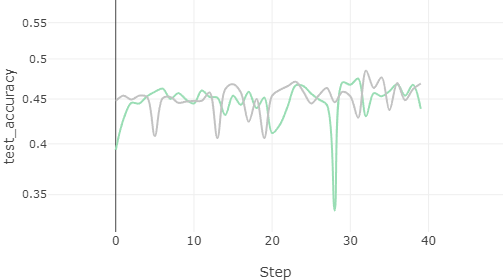

## Brief Summary::
### Removing outliers did not significantly enhance the predictive performance. Considering the dataset's relatively small size, eliminating over 2000 instances, which accounts for more than 30% of the dataset, may not be the best approach.  
### Exploring other data cleaning techniques or further investigation might yield better results.

## Apply transformation
- import different transform functions

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

### StandardScaler

In [150]:
run_name = 'Logistic Regression with StandardScaler'
transform=StandardScaler()
train(csv,run_name = run_name , numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

sample before transform [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]
sample after transform [-0.70715516 -0.2404789   0.14625658 -0.80815119 -0.20118008 -0.93013767
  0.28847889 -0.23246533  0.50839916 -0.27635393 -0.83218392]
transformed


100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

The Maximum accuracy is 0.568445475638051


### MaxAbsScaler

In [151]:
run_name = 'Logistic Regression with MaxAbsScaler'
transform=MaxAbsScaler()
train(csv,run_name = run_name, numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

sample before transform [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]
sample after transform [0.39622642 0.18987342 0.20481928 0.02431611 0.0801964  0.04844291
 0.3        0.95670754 0.82294264 0.245      0.63758389]
transformed


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]

The Maximum accuracy is 0.5390564578499614


### RobustScaler

In [152]:
run_name = 'Logistic Regression with RobustScaler'
transform=StandardScaler()
train(csv,run_name = run_name, numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

sample before transform [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]
sample after transform [-0.70715516 -0.2404789   0.14625658 -0.80815119 -0.20118008 -0.93013767
  0.28847889 -0.23246533  0.50839916 -0.27635393 -0.83218392]
transformed


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]

The Maximum accuracy is 0.568445475638051


### QuantileTransformer

In [153]:
run_name = 'Logistic Regression with QuantileTransformer'
transform= QuantileTransformer()
train(csv,run_name = run_name, numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

sample before transform [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]
sample after transform [0.2017017  0.52352352 0.61611612 0.18168168 0.54504505 0.18968969
 0.6016016  0.41791792 0.70870871 0.43993994 0.25975976]
transformed


100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

The Maximum accuracy is 0.5560711523588554


### MinMaxScaler

In [154]:
run_name = 'Logistic Regression with MinMaxScaler'
transform= MinMaxScaler()
train(csv,run_name = run_name, numInputFeatures=11 , features=None, transform=transform, num_epochs=40)

sample before transform [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]
sample after transform [0.20661157 0.14666667 0.20481928 0.01533742 0.06644518 0.04513889
 0.29032258 0.13283208 0.4496124  0.15168539 0.2173913 ]
transformed


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]

The Maximum accuracy is 0.5583913379737045


## Summary of Average Performance Using Various Transformation Functions
### Documented in MLflow
### The outcomes are listed in the according sequence
   - StandardScaler()
   - MaxAbsScaler()
   - RobustScaler()
   - QuantileTransformer()
   - MinMaxScaler()

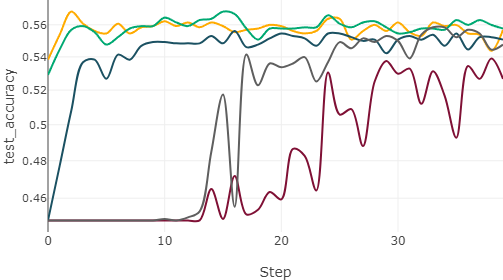


## Thus far, RobustScaler() has yielded the most favorable outcome with Accuracy 0.568%

## Feature Selection

### here we select the features by its index from the variable list
#####  0   fixed acidity
#####  1   volatile acidity    
#####  2   citric acid
#####  3   residual sugar        
#####  4   chlorides             
#####  5   free sulfur dioxide   
#####  6   total sulfur dioxide  
#####  7   density               
#####  8   pH                    
#####  9   sulphates             
#####  11  quality              
### 1.  sulphates (9) + alcohol (10)

In [155]:
# num of input Features = 2
run_name = 'sulphates+alcohol'
transform= RobustScaler()
features=[9,10]
train(csv,run_name = run_name, numInputFeatures=2 , features=features, transform=transform, num_epochs=40)

sample before transform [0.49, 9.5]
sample after transform [-0.11764706 -0.44444444]
transformed


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]

The Maximum accuracy is 0.5290023201856149


In [156]:
# num of input Features = 2
run_name = 'sulphates+alcohol'
transform= None
features=[9,10]
train(csv,run_name = run_name, numInputFeatures=2 , features=features, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

The Maximum accuracy is 0.5197215777262181


### 2.  volatile acidity (1) + citric acid(2) + residual sugar(3)

In [157]:
# num of input Features = 2# num of input Features = 4
run_name = 'volatile acidity+citric acid+residual sugar'
transform= RobustScaler()
features=[1,2,3]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

sample before transform [0.3, 0.34, 1.6]
sample after transform [ 0.05882353  0.21428571 -0.22222222]
transformed


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]

The Maximum accuracy is 0.5065738592420727


In [158]:
# try MinMaxScaler()
run_name = 'volatile acidity+citric acid+residual sugar'
transform= None
features=[0,1,2,3]
train(csv,run_name = run_name, numInputFeatures=4 , features=features, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:40<00:00,  1.02s/it]

The Maximum accuracy is 0.5019334880123744


### 3.  alcohol (10)

In [159]:
# try MinMaxScaler()
run_name = 'alcohol with RobustScaler()'
transform= RobustScaler()
features=[10]
train(csv,run_name = run_name, numInputFeatures=1 , features=features, transform=transform, num_epochs=40)

sample before transform [9.5]
sample after transform [-0.44444444]
transformed


100%|██████████| 40/40 [00:41<00:00,  1.03s/it]

The Maximum accuracy is 0.5274555297757154


In [160]:
run_name = 'alcohol'
transform= None
features=[10]
train(csv,run_name = run_name, numInputFeatures=1 , features=features, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:42<00:00,  1.06s/it]

The Maximum accuracy is 0.5266821345707656


### 4.  density(7) + pH(8) + alcohol (10)

In [161]:
# try MinMaxScaler()
run_name = 'density+pH+alcohol with RobustScaler()'
transform= RobustScaler()
features=[7,8,10]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

sample before transform [0.994, 3.3, 9.5]
sample after transform [-0.19057816  0.42857143 -0.44444444]
transformed


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]

The Maximum accuracy is 0.5336426914153132


In [162]:
# try MinMaxScaler()
run_name = 'density+pH+alcohol'
transform= None
features=[7,8,10]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:40<00:00,  1.01s/it]

The Maximum accuracy is 0.5166279969064191


### 5.  volatile acidity(1) +citric acid(2)+ residual sugar(3) 

In [163]:
# try MinMaxScaler()
run_name = '3 feartures with MinMaxScaler'
transform= MinMaxScaler()
features=[1,2,3]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

sample before transform [0.3, 0.34, 1.6]
sample after transform [0.14666667 0.20481928 0.01533742]
transformed


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]

The Maximum accuracy is 0.49961330239752516


In [164]:
# try MinMaxScaler()
run_name = '3 feartures'
transform= None
features=[1,2,3]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

100%|██████████| 40/40 [00:36<00:00,  1.09it/s]

The Maximum accuracy is 0.5042536736272235


In [165]:
# try MinMaxScaler()
run_name = '3 feartures with RobustScaler'
transform= RobustScaler()
features=[1,2,3]
train(csv,run_name = run_name, numInputFeatures=3 , features=features, transform=transform, num_epochs=40)

sample before transform [0.3, 0.34, 1.6]
sample after transform [ 0.05882353  0.21428571 -0.22222222]
transformed


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

The Maximum accuracy is 0.5073472544470224


## Comparison of Results Based on Feature Selection
### The testing outcomes are presented in the same sequence as the feature selection testing process.
### Documented in Mlflow

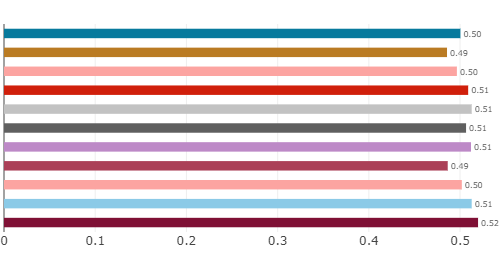

## density+pH+alcohol with RobustScaler has yielded the most favorable outcome with Accuracy 0.533%

# Summary

## Overall Performance:
### Relative to the baseline model using the original dataset, the implementation of transformations and feature/predictor selection has clearly enhanced the model's performance. Notably, the accuracy metric showed a substantial increase, improving from a modest 46% to a more robust 56.4%. This indicates a significant step forward in the model's predictive capabilities and reliability.

## The Utilization of Machine Learning:
### In this project, employing PyTorch has greatly streamlined the training and testing procedures, offering a more efficient and user-friendly experience. Furthermore, data visualization via MLflow has been invaluable, not only in facilitating the real-time monitoring of test results but also in enabling a thorough comparison of the performance across various metrics. This has allowed for more informed decision-making and iterative enhancements throughout the project's lifecycle.

## Model's Limitation:
### Considering the model is a basic Logistic Regression, its limitations are evident. Logistic Regression inherently assumes a linear relationship between the independent variables and the log odds of the dependent variable. This assumption potentially oversimplifies the model's understanding of the data structure and the dynamics between variables, leading to less nuanced predictions.

## Further Improvement:
### The assumption of linearity restricts the model's ability to capture more complex relationships in data that may be better explained by non-linear models. Therefore, for further improvement, exploring more sophisticated machine learning techniques such as Random Forests, Gradient Boosting Machines, or Neural Networks might be beneficial. These models can uncover and leverage non-linear patterns and interactions between variables, potentially leading to significant improvements in model performance. Additionally, a deeper dive into feature engineering and the inclusion of interaction terms could provide a more detailed and intricate representation of the underlying phenomena, contributing to a more accurate and generalized model.
